In [1]:
# Import necessary libraries: Numpy,pandas,matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# read meal_info.csv file from provided dataset into a df_meal named variable
df_meal = pd.read_csv("mydata/meal_info.csv")  # meal_info.csv: Product(Meal) features such as category, 
                                            # sub-category, current price and discount

# read fulfilment_center_info.csv file from provided dataset
df_center = pd.read_csv("mydata/fulfilment_center_info.csv") # fulfilment_center_info.csv: Information for fulfillment 
                                                            # center like center area, city information etc.


# read train.csv file from provided dataset
df_food = pd.read_csv("mydata/train.csv")  # train.csv: Historical data of demand for a product-center combination

In [2]:
df = pd.merge(df_center, df_food, on='center_id') 

In [3]:
df = pd.merge(df, df_meal, on= 'meal_id') 

In [4]:
table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)
# This fn creates a table of two columns first column will contain the all unique elements of column which is passed as 
# index and second column contains values f(all values for that elements which corresponds in column passed as values) 
# where f() is function passed as aggfunc, and by default it is np.mean()

x = np.array(table.index)
y = np.array(table.values)
y = np.array([y[i][0] for i in range(len(y))])


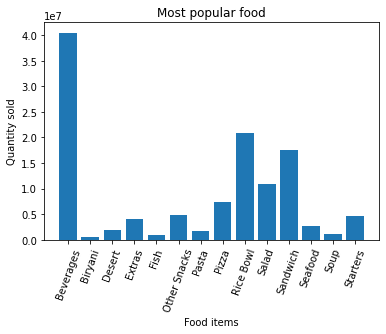

In [5]:
# this is for plotting purpose
plt.bar(x,y)
plt.xlabel('Food items')
plt.ylabel('Quantity sold')
plt.xticks(rotation=70)
plt.title('Most popular food')
plt.show()

In [6]:
df['revenue'] = df['checkout_price'] * df['num_orders']
df['month'] = (df['week'] - 1)//4

In [7]:
table = pd.pivot_table(data=df,index='month',values='revenue',aggfunc=np.sum)
month = np.array(table.index)
month_order = np.array(table.values)
month_order = np.array([month_order[i][0] for i in range(len(month_order))])


In [8]:
table = pd.pivot_table(data=df,index='week',values='revenue',aggfunc=np.sum)
week = np.array(table.index)
week_order = np.array(table.values)
week_order = np.array([week_order[i][0] for i in range(len(week_order))])


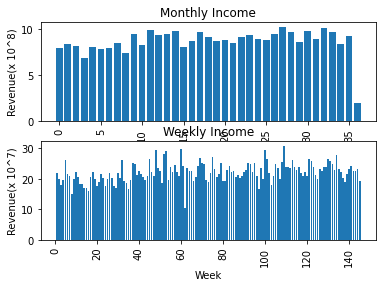

In [9]:
plt.subplot(2,1,1)

plt.bar(month, month_order/10**8)
plt.title('Monthly Income')
plt.xlabel('Month')
plt.ylabel('Revenue(x 10^8)')
plt.xticks( rotation='vertical')

plt.subplot(2,1,2)

plt.bar(week, week_order/10**7)
plt.title('Weekly Income')
plt.xlabel('Week')
plt.ylabel('Revenue(x 10^7)')
plt.xticks( rotation='vertical')
plt.show()

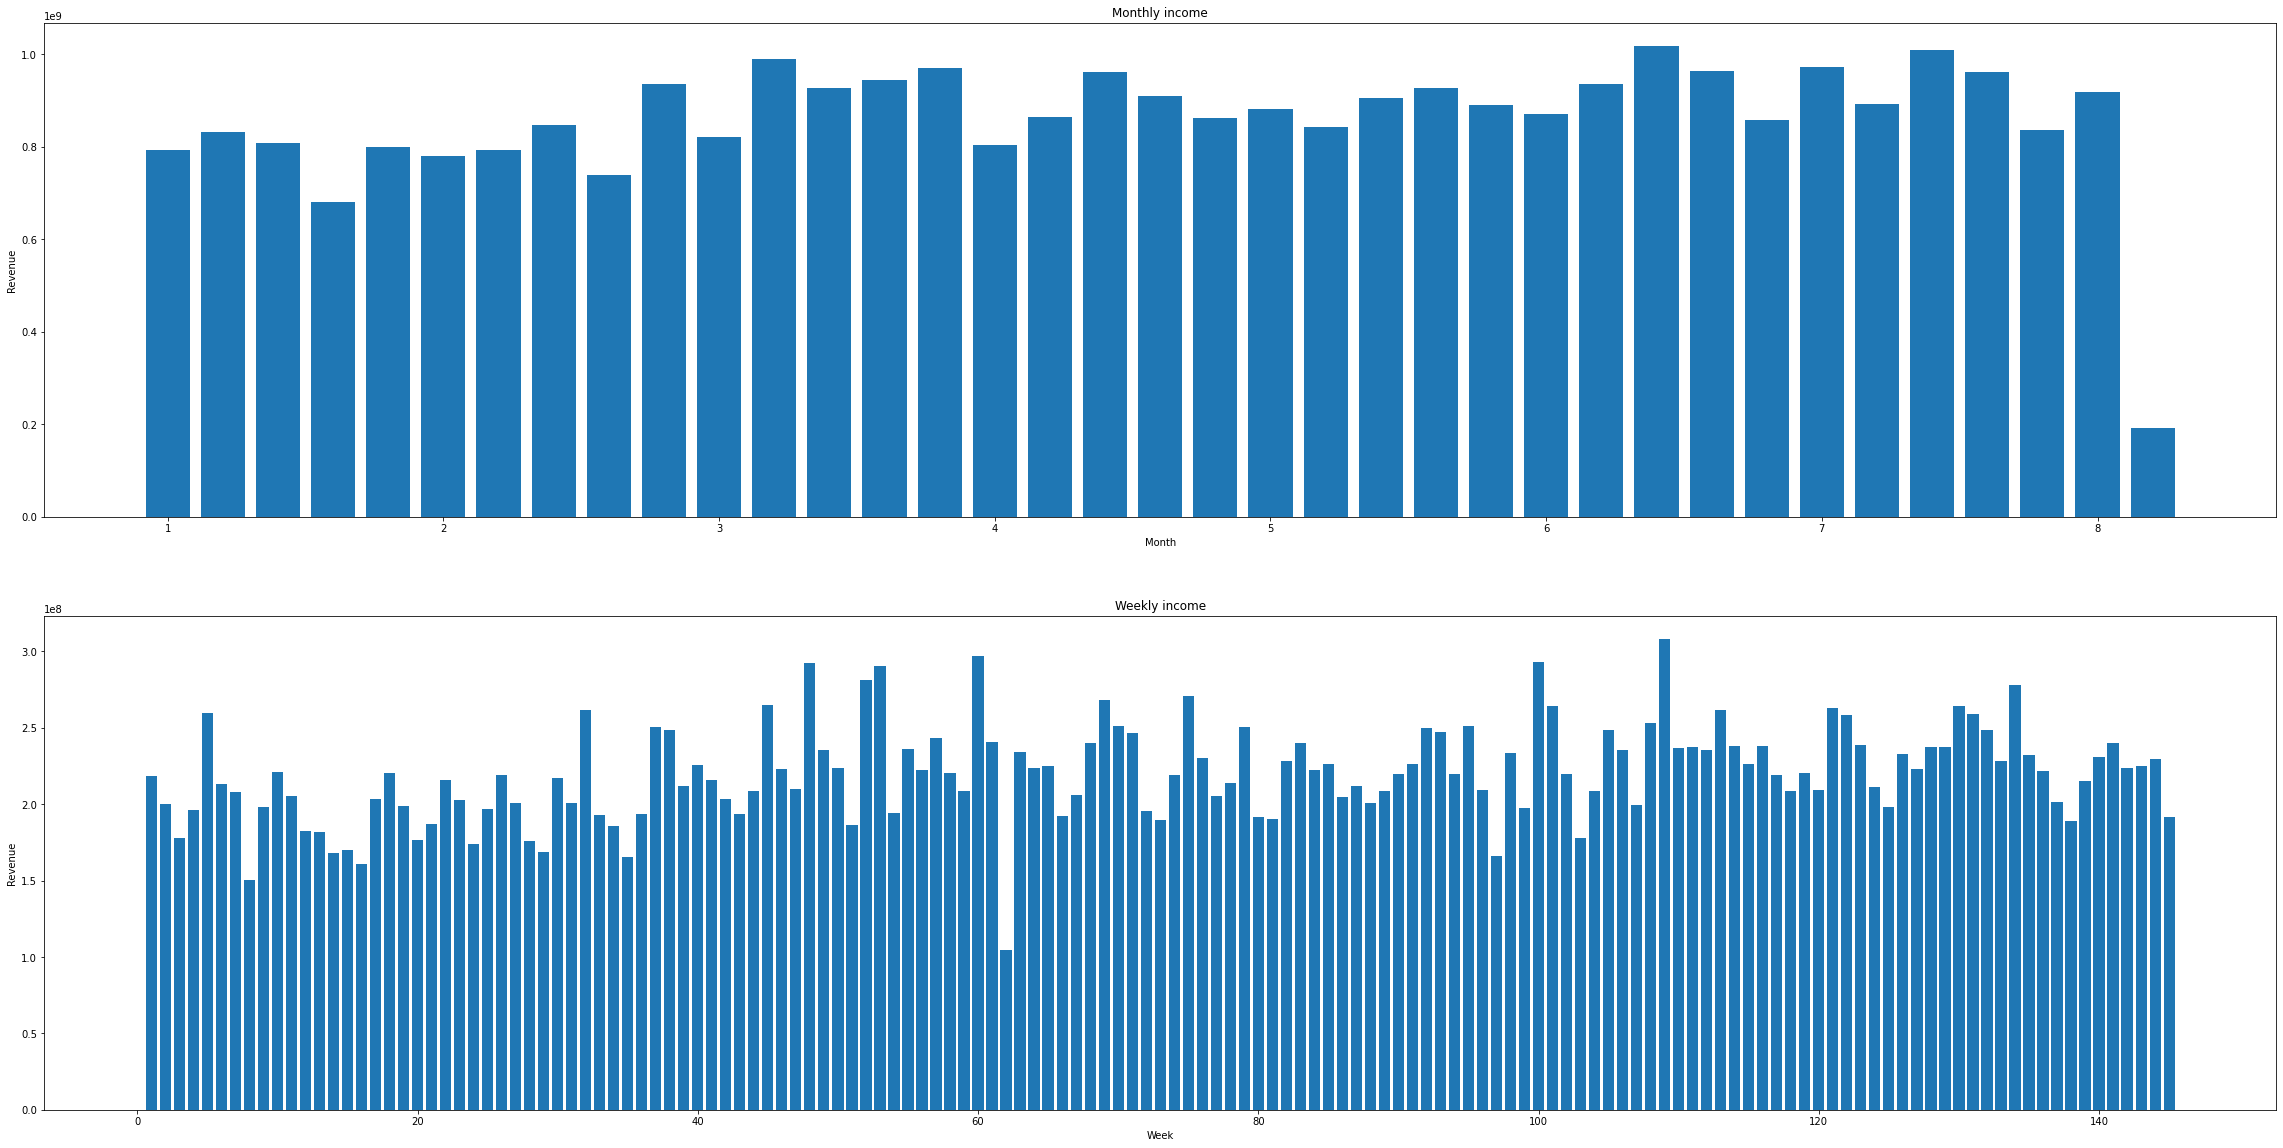

In [10]:
fig = plt.figure(figsize=(40,20))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.bar(month, month_order)
ax2.bar(week, week_order)

ax1.set_xlabel('Month')
ax1.set_ylabel('Revenue')
ax1xtick = [str(item) for item in month]
ax1.set_xticklabels(ax1xtick, rotation=0)
ax1.set_title("Monthly income")

ax2.set_xlabel('Week')
ax2.set_ylabel('Revenue')
# ax2.set_xticklabels(table.index, rotation=0, fontsize='12')
ax2.set_title("Weekly income")
plt.show()